### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**Техническое задание:**

Необходимо провести анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

***Портет***

- Составить профили пользователей.
- Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. - Уточнить какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

***Маркетинг***

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам.
- Построть визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Уточнить сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

***Окупаемость рекламы***

- Уточнить окупается ли реклама, направленная на привлечение пользователей в целом.
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы.
- Чем могут быть вызваны проблемы окупаемости.

In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import math
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# загружаем данные
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
# посмотрим таблицу визиты
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


***Столбцы с датой необходимо привести к типу datetime, названия столбцов привести к нижнему регистру.***

In [5]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
# проверка
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [7]:
# проверка дубликатов
visits.duplicated().sum()

0

In [8]:
# проверка пропусков
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [9]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [10]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [11]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Таблица visit имеет 309901 строк и содержит следующую информацию:
    

- user_id  — уникальный идентификатор пользователя
- region — страна пользователя
- device — тип устройства пользователя
- channel — идентификатор источника перехода
- session_start — дата и время начала сессии
- session_end — дата и время окончания сессии


В таблице хранятся данные о пользователях из 4 стран: США, Великобритания, Франция, Германия. Устройства, с которых регистрируются пользователи, тоже 4. Привлекаются пользователи из 11 различных каналов.

In [12]:
# посмотрим таблицу orders
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


***Столбцы с датой необходимо привести к типу datetime, названия столбцов привести к нижнему регистру.***

In [14]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
#проверим на наличие явных дубликатов
orders.duplicated().sum()

0

In [16]:
#оценим среднее, медиану, минимальные и максимальные показатели в суммах заказа
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [17]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Таблица orders имеет 40212 строк и содержит следующую информацию:
    

- user_id — уникальный идентификатор пользователя
- event_dt — дата и время покупки
- revenue — сумма заказа.

Основная сумма заказов на 4.99 - это минимальная сумма заказа. Максимальный заказ был совершен на сумму 49.99.

In [18]:
# посмотрим таблицу costs
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


***Столбцы с датой необходимо привести к типу datetime, названия столбцов привести к нижнему регистру.***

In [20]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.columns = costs.columns.str.lower()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [21]:
#проверим на наличие явных дубликатов
costs.duplicated().sum()

0

In [22]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

 
Таблица cost имеет 1800 строк и содержит следующую информацию:
    

- dt — дата проведения рекламной кампании
- channel — идентификатор рекламного источника
- costs — расходы на эту кампанию.


Большой разброс по затратам на рекламные кампании. 

Среднее значение от медианы отличается на 46 долларов.

Стандартное отклонение равно 107.7

Минимальная рекламная кампания обошлась в 0.8 долларов, а максимальная в 630

Более 75% всех рекламных кампаний приходятся на суммму до 34 долларов

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

***Функции для вычисления значений метрик:***

In [23]:
# функция для создания профилей пользователей
def get_profiles(sessions, orders, ad_costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time


# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time


# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,
        result_grouped,
        result_in_time,
        roi_grouped,
        roi_in_time,
    )

***Функции для построения графиков:***

In [24]:
# функция для сглаживания фрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() # для каждого столбца применяем скользящее среднее
    return df


# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей, используем функцию get_profiles и передав ей в качестве аргумента таблицы visits, orders, costs

In [25]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Определим минимальную и максимальную даты привлечения пользователей

In [26]:
print('Минимальная дата привлечения клиентов:', profiles['dt'].min().date())
print('Максимальная дата привлечения клиентов:', profiles['dt'].max().date())

Минимальная дата привлечения клиентов: 2019-05-01
Максимальная дата привлечения клиентов: 2019-10-27


#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны

In [27]:
# параметр для выбора пользователь и плательщик
parameter = ['user_id', 'payer']

In [28]:
# страна
country_payment = profiles.groupby('region').agg({'user_id': 'count', 'payer': 'sum'})\
.sort_values(by='user_id', ascending=False)

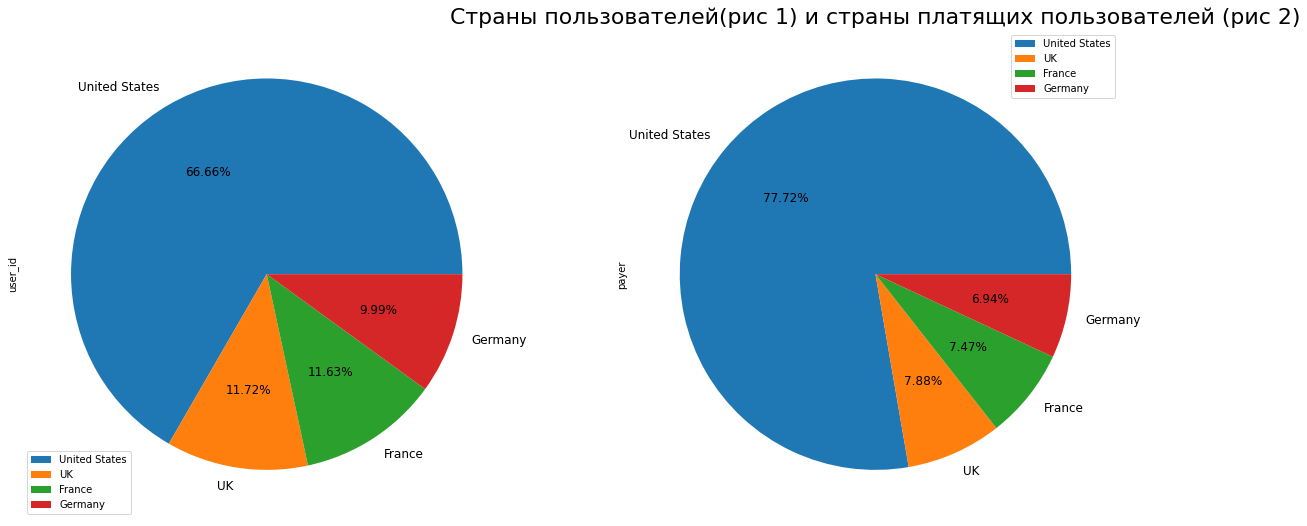

In [29]:
fig, axes = plt.subplots(1,2, figsize=(20,9))
for i, p in enumerate(parameter):
    plot = country_payment.plot(y=p, kind='pie', label=p, ax=axes[i], 
                   fontsize=12, rot=20, autopct='%.2f%%')
plt.title('Страны пользователей(рис 1) и страны платящих пользователей (рис 2)', fontsize=22)
plt.show()

In [30]:
#посчитаем процент платящих пользователей по каждой стране
country_payment['percent_payment'] = country_payment['payer']/country_payment['user_id']*100
country_payment

,user_id,payer,percent_payment
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


***Выводы:***

Из всех пользователей приложения основная доля у пользователей США- 66,7% . Во Франции, Германии, Великобританиии пользователей 10-12%. 

Платящих пользователей больше всего в США- 77,7% от всех платящих пользователей.

Платят пользователи только в 3,7-6,9% случаев. В США платят -6.9%, худший результат во Франции-3,8%

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [31]:
# Построим круговую диаграмму, чтобы посмотреть долю устрйств пользователей в %
device_payment = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'sum'})\
.sort_values(by='user_id', ascending=False)

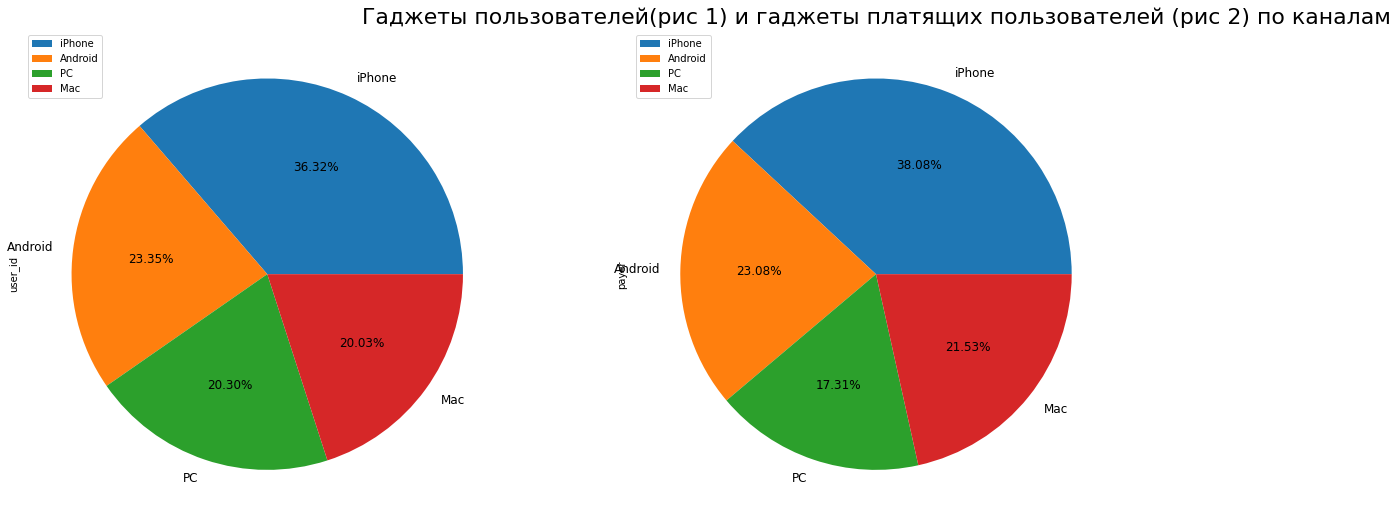

In [32]:
fig, axes = plt.subplots(1,2, figsize=(20,9))
for i, p in enumerate(parameter):
    plot = device_payment.plot(y=p, kind='pie', label=p, ax=axes[i], 
                   fontsize=12, rot=20, autopct='%.2f%%')
plt.title('Гаджеты пользователей(рис 1) и гаджеты платящих пользователей (рис 2) по каналам', fontsize=22)
plt.show()

In [33]:
# процент платящих пользователей по гаджету
device_payment['percent_payment'] = device_payment['payer']/device_payment['user_id']*100
device_payment

,user_id,payer,percent_payment
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


***Выводы:***

Основное устройство iPhone- 36%. Доля приложений на MAC, Android и РС примерно одинаковая- от 20 до 23,4%.

Гаджеты платящих пользователей: iPhone- 38%, далее Android -23%, MAC и РС - 21% и 17%.

Меняют статус из "неплатящих" на "платящих" 5-6%.

In [34]:
channel_payment = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'sum'})\
.sort_values(by='user_id', ascending=False)

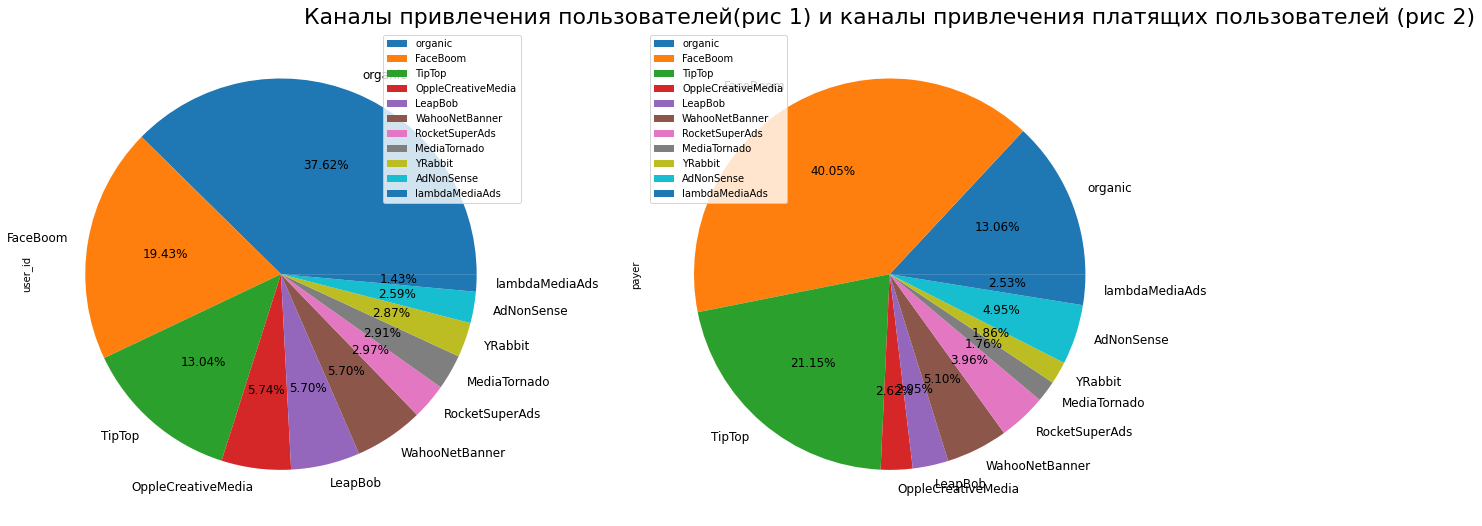

In [35]:
# каналы привлечения пользователей в %
fig, axes = plt.subplots(1,2, figsize=(20,9))
for i, p in enumerate(parameter):
    plot = channel_payment.plot(y=p, kind='pie', label=p, ax=axes[i], 
                   fontsize=12, rot=20, autopct='%.2f%%')
plt.title('Каналы привлечения пользователей(рис 1) и каналы привлечения платящих пользователей (рис 2)', fontsize=22)
plt.show()

In [36]:
# %% платящих пользователей по каналу привлечения
channel_payment['percent_payment'] = channel_payment['payer']/channel_payment['user_id']*100
channel_payment = channel_payment.sort_values(by='percent_payment', ascending=False)
channel_payment

,user_id,payer,percent_payment
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


***Выводы:***

Основная доля пользователей у organic - почти 37.6%, доля FaceBoom и Tip Top- 19% и 13%. Остаток 26% относительно равномерно распределен между другими каналами.

Основную доля платящих пользователей привлечена через канал FaceBoom(40%). Следующий канал Tip Top- 21%. Доля organic - 13%. Оставшиеся 8 каналов суммарно составляют 26%, доля каждого из которыз не превышает 5%.

Процент перехода из "неплатящих" в "платящих" по каждому каналу: чаще всего готовы соверщать покупки пользователи из FaceBoom, AdNonSense, lammbdaMediaAds, Tip Top, RocketSuperAds- процент совершенных покупок 8-12%.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг, выясним как траты распределены по рекламным источникам

In [37]:
# общая сумма расходов на маркетинг
print('Общая сумма расходов на маркетинг:',  round(costs['costs'].sum(), 2))

Общая сумма расходов на маркетинг: 105497.3


In [38]:
# выясним как траты распределены по рекламным источникам
profiles['%'] = profiles['acquisition_cost']/costs['costs'].sum()*100
profiles.groupby('channel').agg({'acquisition_cost': 'sum', '%' : 'sum'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost,%
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


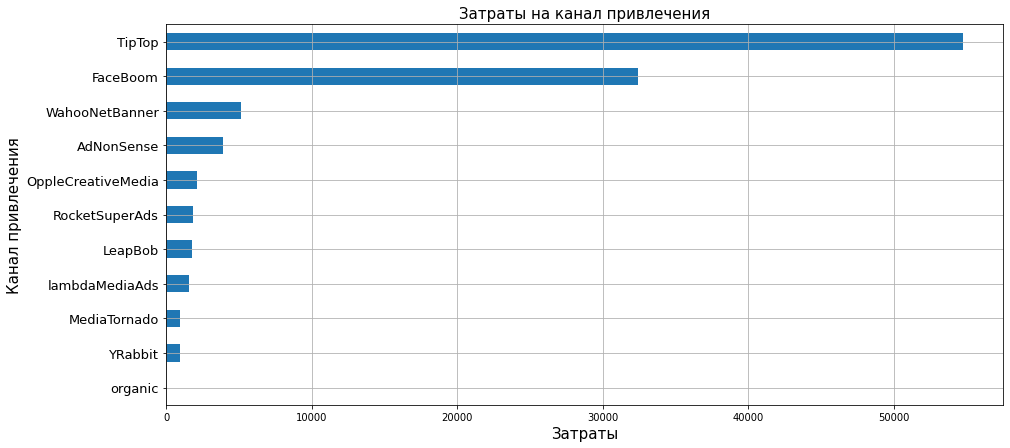

In [39]:
# диаграмма распределения затрат по источникам
params = {'ytick.labelsize': 13,
          'axes.titlesize': 9}
plt.rcParams.update(params)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
(
    profiles.groupby('channel').agg({'acquisition_cost': 'sum'})
    .sort_values(by='acquisition_cost')
    .plot(kind= 'barh', figsize=(15, 7), legend = False,  grid=True)
)
plt.xlabel('Затраты', fontsize=15)
plt.ylabel('Канал привлечения', fontsize=15)
plt.title('Затраты на канал привлечения', fontsize=15);

***Выводы:***  

Основная доля расходов на маркетинг - канал ТipTop. Следующий канал с наибольшей суммой затрат на рекламу FaceBoom. Распределение, с учетом вышеприведенных выводов по платящим пользователям, непонятно.

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

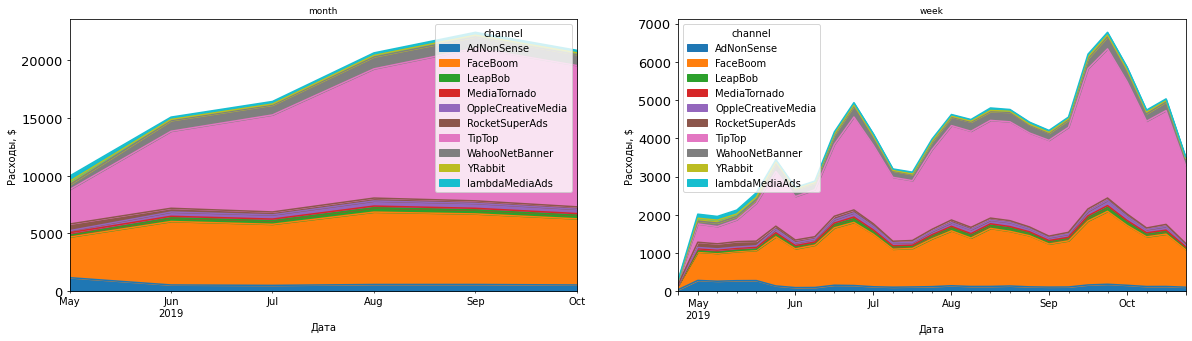

In [40]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')
columns = ['month', 'week']
plt.subplots(figsize = (20, 5))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Дата')
    plt.ylabel('Расходы, $')
  
plt.show() 

***Выводы:***

Виден рост расходов на TipTop, при относительно равномерных расходах на следующий по величине канал FaceBoom

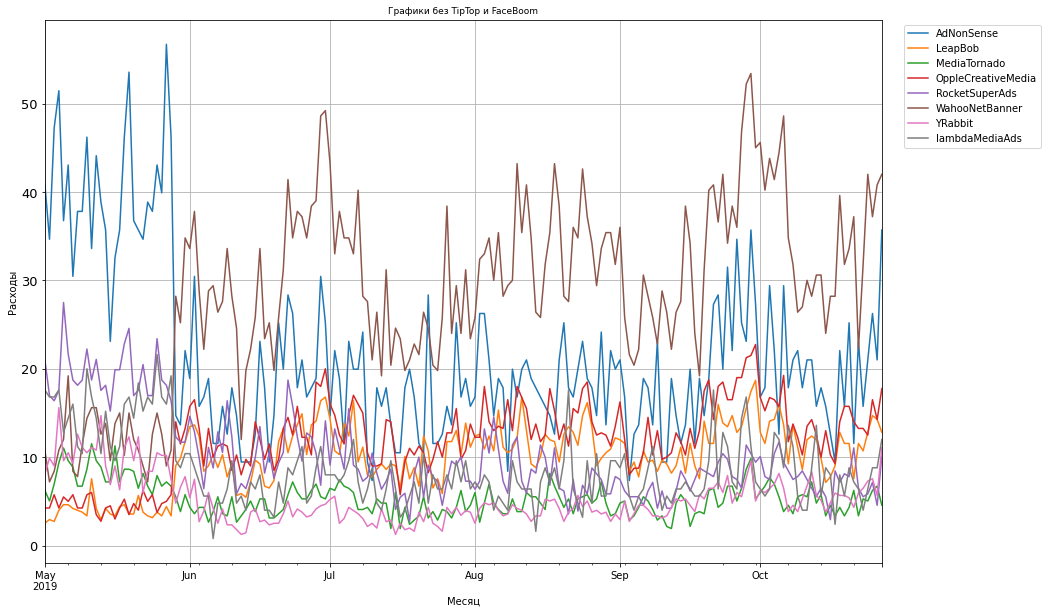

In [41]:
costs2 = costs[(costs.channel != 'FaceBoom') & (costs.channel != 'TipTop')]
costs2.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Графики без TipTop и FaceBoom')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

***Комментарии:***

Расходы без двух лидеров находятся в общем тренде, за исключением скачка в AdNonSense в начале года, и наличии лидера в этой группе - WahooNetBanner. Будем иметь в виду при дальнейшем анализе.

####  Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [42]:
cost_mean = profiles.groupby('channel').agg({'acquisition_cost': 'mean'})\
.sort_values(by='acquisition_cost', ascending=False).reset_index()
cost_mean

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


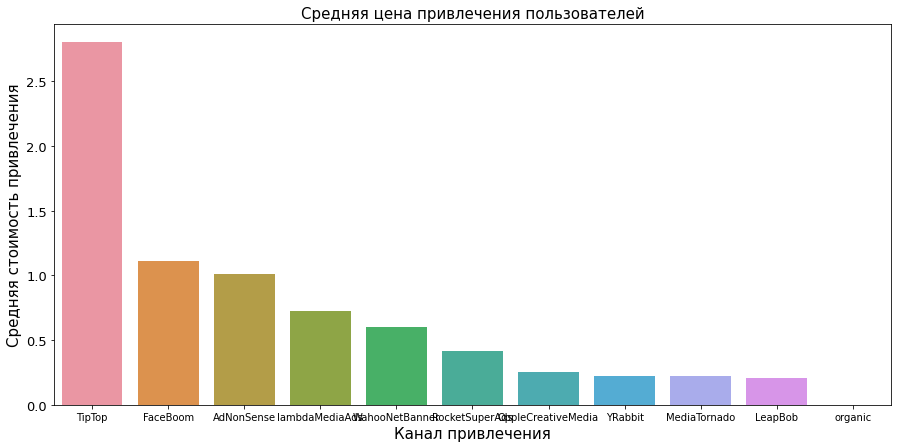

In [43]:
plt.figure(figsize=(15,7))
plt.title('Средняя цена привлечения пользователей', fontsize=15)
sns.barplot(data=cost_mean, x='channel', y='acquisition_cost')
plt.xlabel('Канал привлечения', fontsize=15)
plt.ylabel('Средняя стоимость привлечения', fontsize=15);

***Выводы:*** 

В тройке лидеров TipTop, FaceBoom и AdNonSense. При этом пользователи из канала FaceBoom и AdNoneSense обходятся в среднем в 1$, а TipTop почти 2.7. Следующий каналы идут с равномерным снижением расходов от примерно 0.7 до 0.2 дол. (исключая organic). Основания для расходов на TipTop непонятны.

In [44]:
# средний CAC (без учета органических пользователей)
print(profiles[profiles.channel != 'organic'].agg({'acquisition_cost': 'mean'}))

acquisition_cost    1.127481
dtype: float64


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

Зададим горизонт данных и момент анализа. Избавимся от пользователей из канала organic, так как они могут исказить наши показатели при дальнейшем анализе.

In [45]:
profiles = profiles.query('channel != "organic"') #исключаем из таблицы органических пользователей.
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

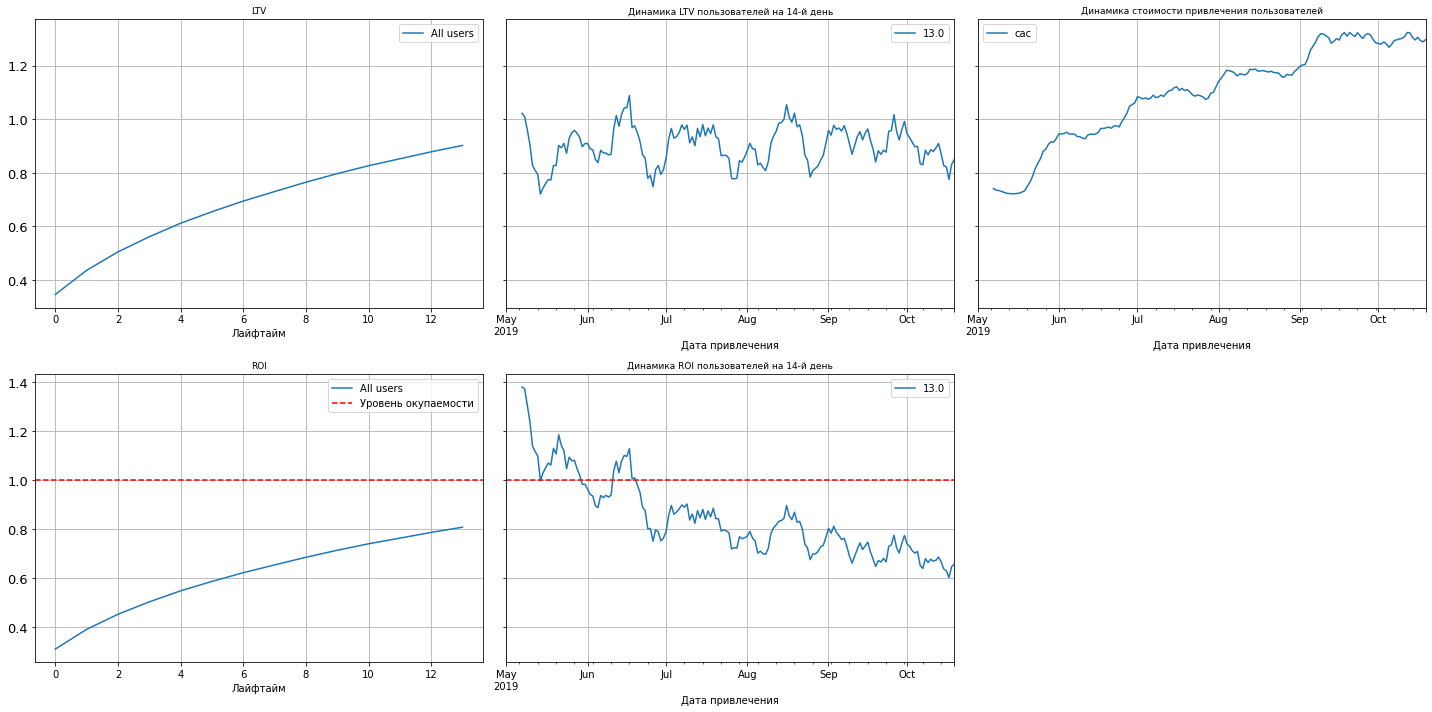

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

***Выводы:*** 

LTV растет, прибыль с каждого клиента возрастает на протяжении всего "лайфтайма". 

Окупаемость пользователей к концу второй недели составляет всего лишь 80%. 

Показатель САС на протяжении всего периода растёт

Показатель ROI в этот же период идёт вниз. 

С июня месяца привлеченные пользователи не окупаются.

#### Проверим конверсию пользователей и динамику её изменения, аналогично с удержанием пользователей. Построим и изучим графики конверсии и удержания.

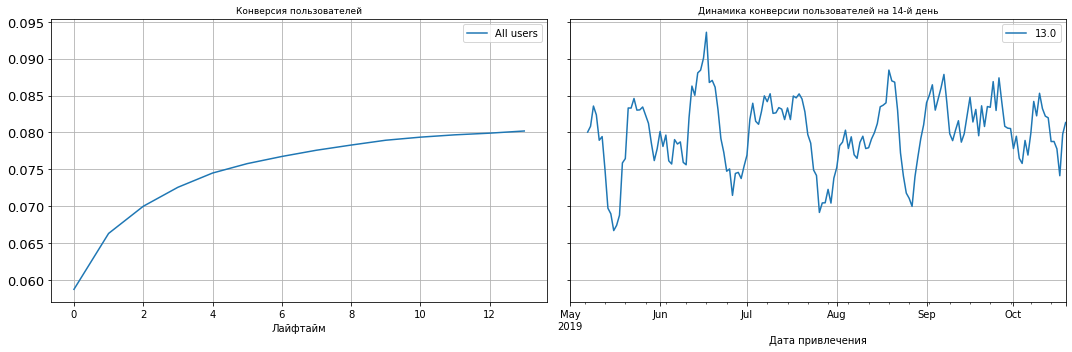

In [47]:
# конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

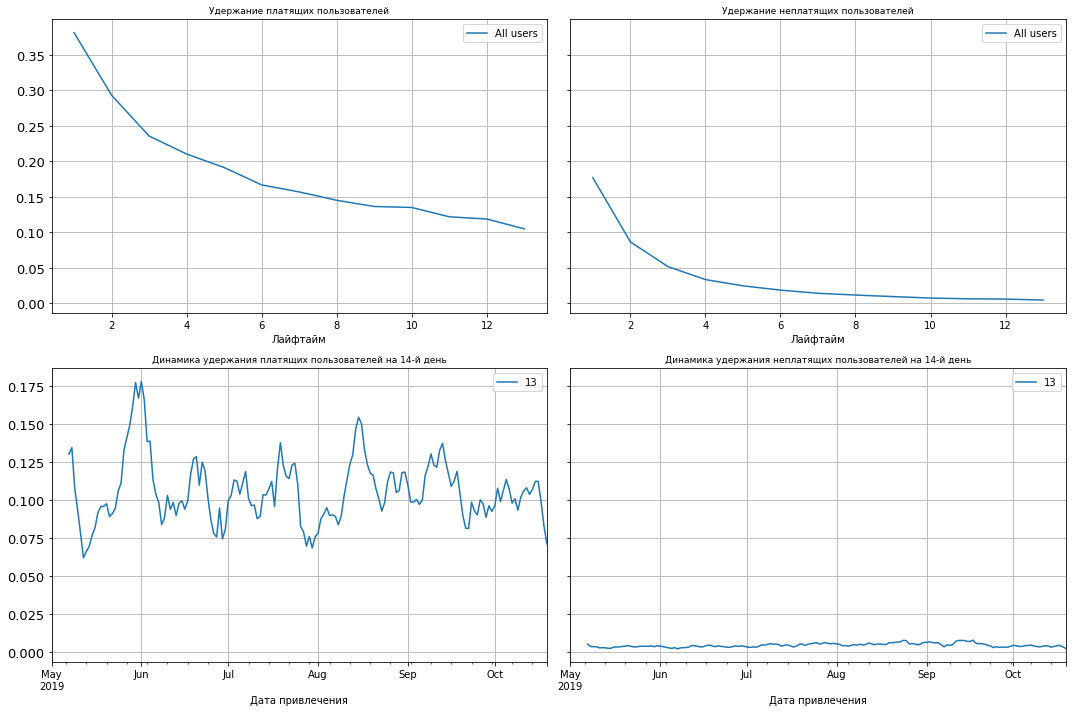

In [48]:
# удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

***Выводы:***

Пользователи хорошо конвертируются в первые 4 дня, далее далее рост сохраняется, но темпы падают.

Удержание платящих пользователей в первый день составляет около 37%. Далее равномерно снижается на протяжении периода до 10%. У неплатяжщи пользователей верхняя граница начинается с примерно 17% с дальнейшим равномерным снижением до нуля. 

Максимальное удержание на 14-й день в июне(17.5%).

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

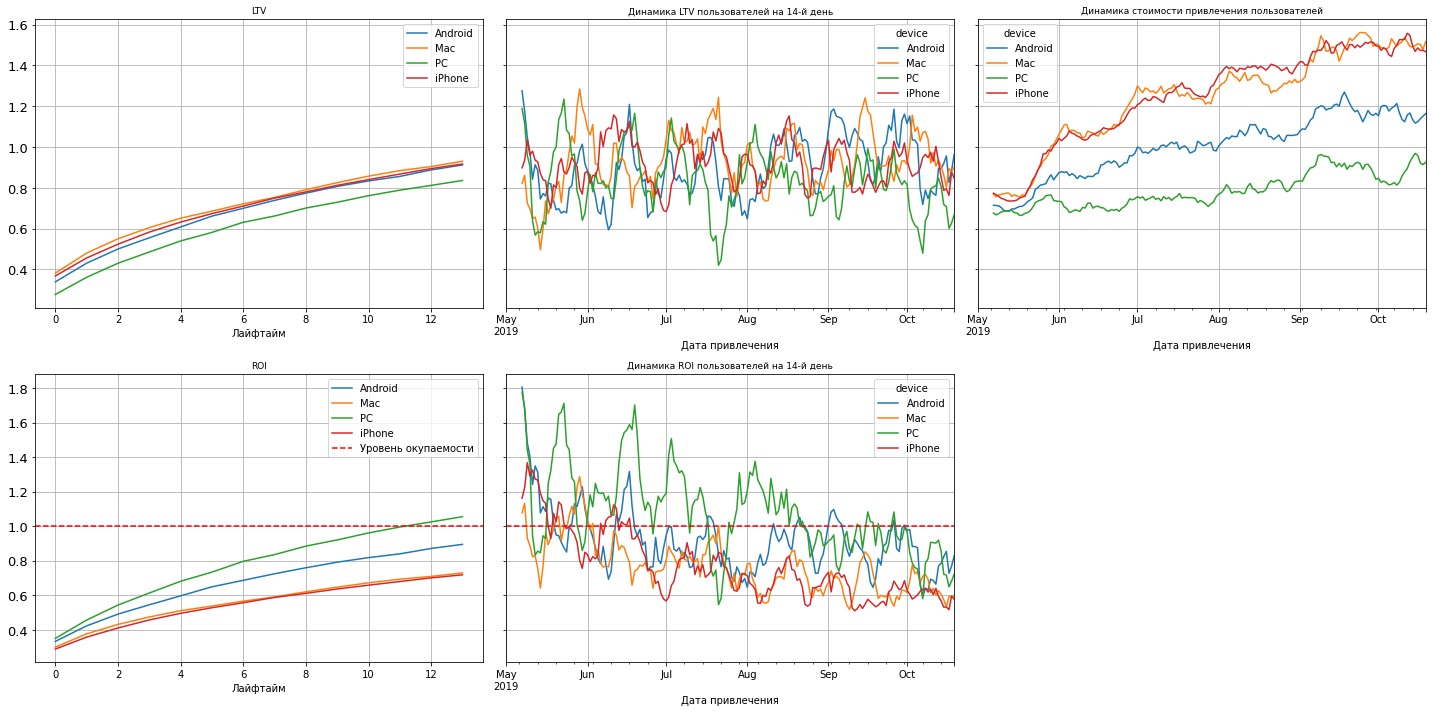

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
) 

***Выводы:***

LTV пользователей всех устроиств растёт.

Окупается только категория пользователей PC, но LTV держателей PC самая низкая. 

Затраты на привлечение держателей iPhone и Mac выше, чем привлечение пользователей Andrid и PC  и ,со временем, разрыв увеличивается.

Динамика ROI пользователей на 14-й день показывает, что мае-июне месяце окупались пользователи либо окупались, либо были близки к точке безубыточности, в остальные месяца ROI падает ниже точки безубыточности. Пользователи PC деражлись в плюсе до сентября, iphone  сразу ушел в минус.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

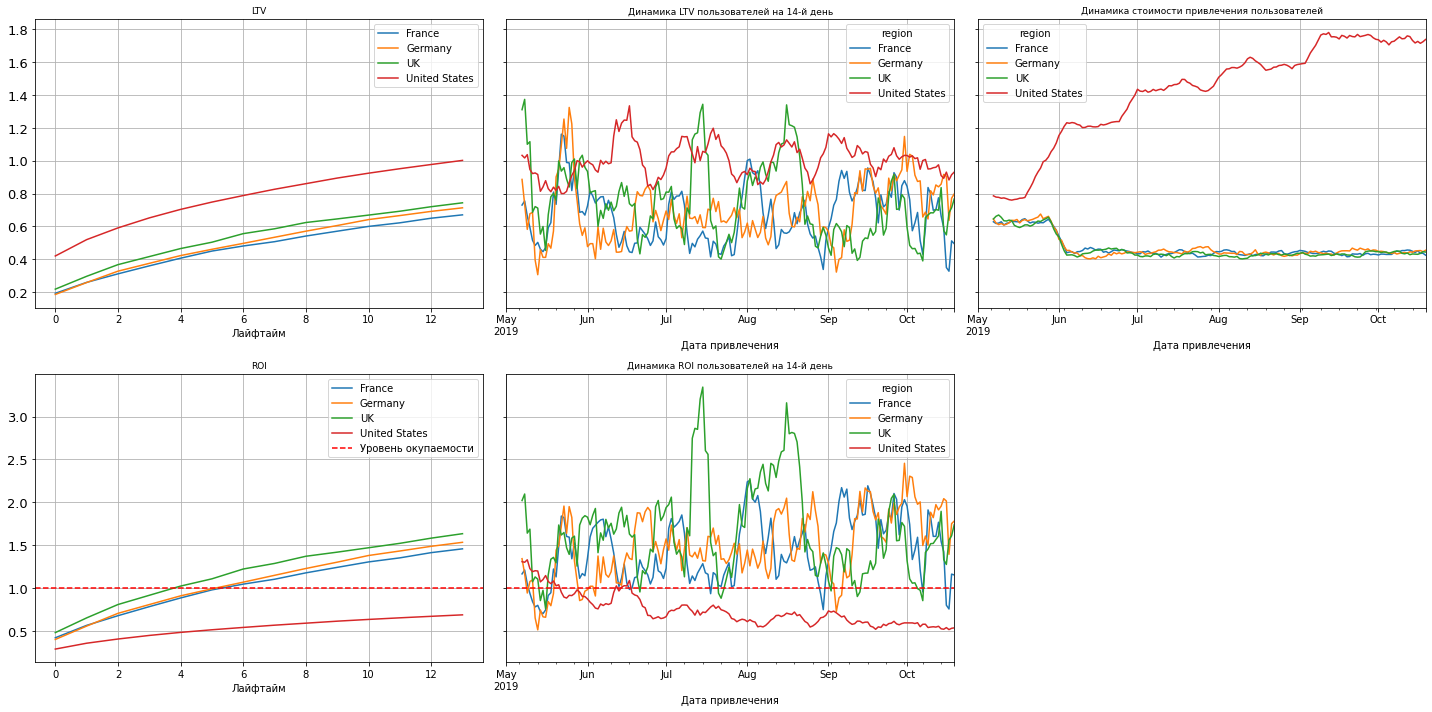

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
) 

***Выводы:***

Пользователи США имеют сумарно приносят больше прибыли чем другие страны, но ROI пользователей этой страны ниже, чем у пользователей других стран. 

На протяжении всего периода(с незначительными исключениями), "США" не окупаются в связи с ростом САС. Проверми удержание и конверсию пользователей из США.

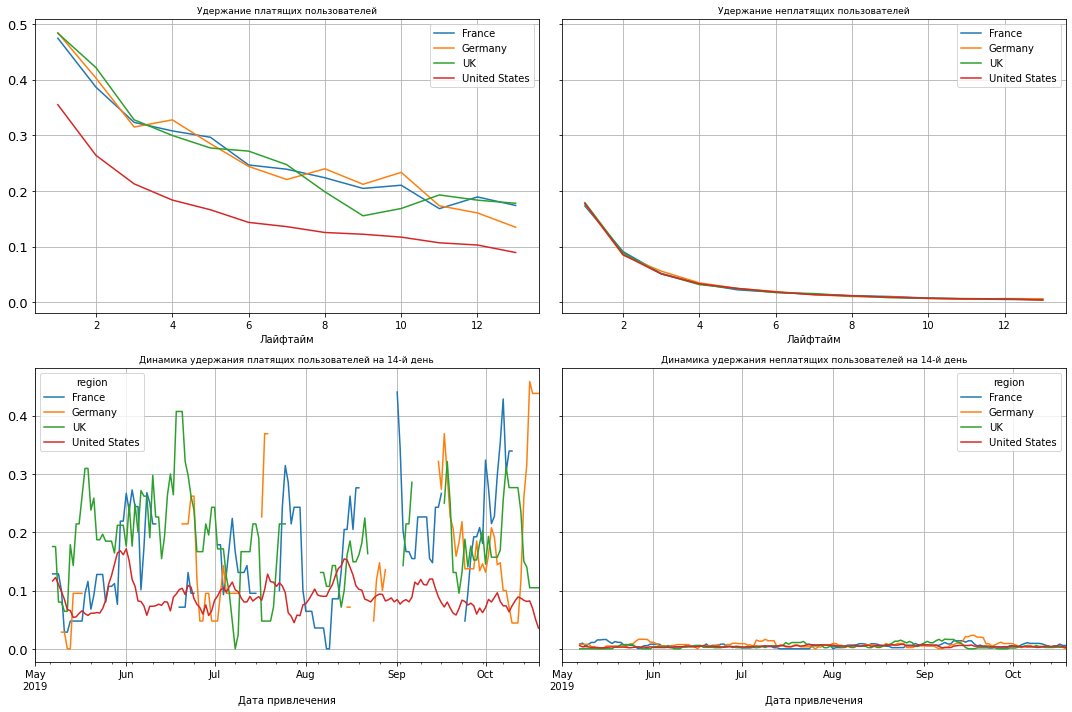

In [51]:
# удержание пользователей из США
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention_grouped, retention_history, horizon_days) 

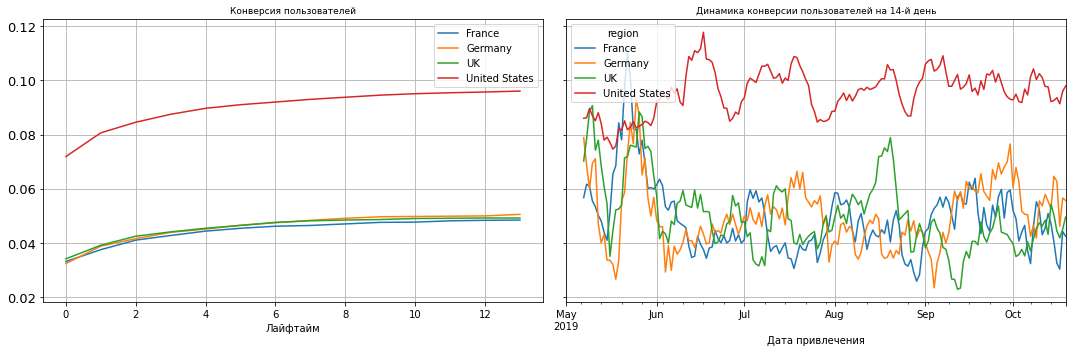

In [52]:
# конверсия пользователей из США
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

***Выводы:***

Удержание пользователей из США хуже остальных страны.

Конверсия позователей из Франции, Германии, Великобритании уступает пользователям из США с незначительными исключениями.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

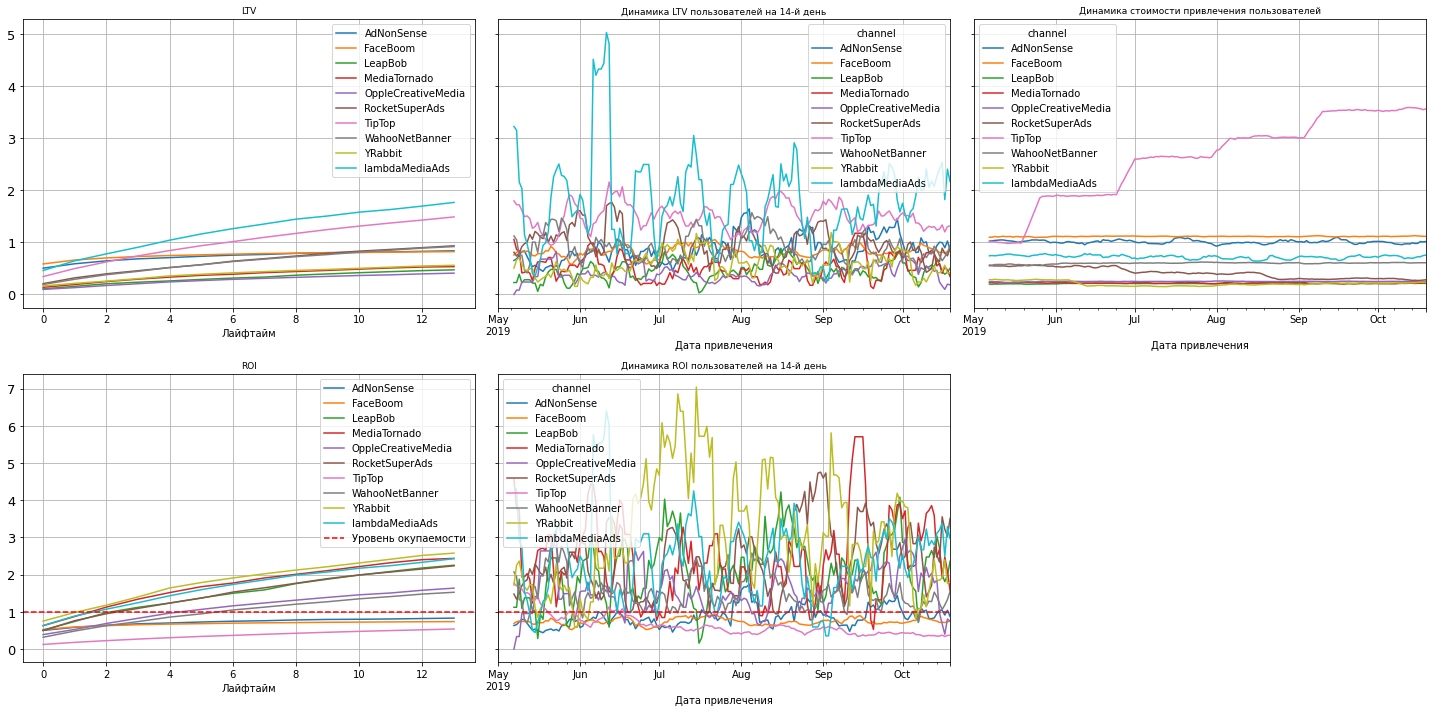

In [53]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

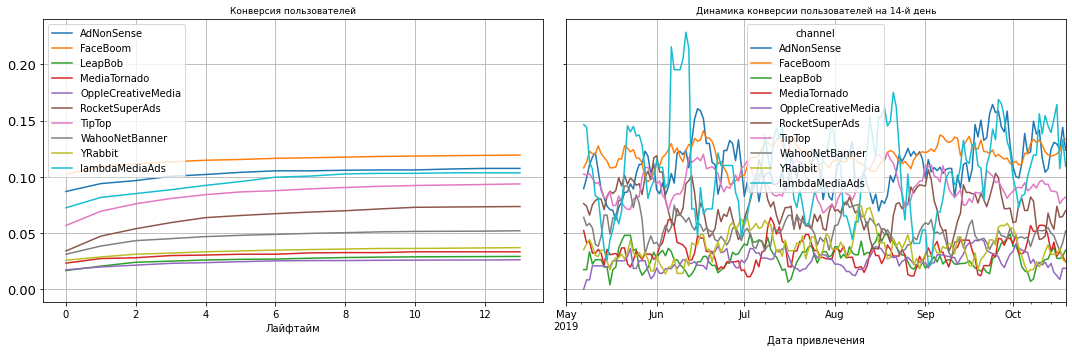

In [54]:
# конверсия с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

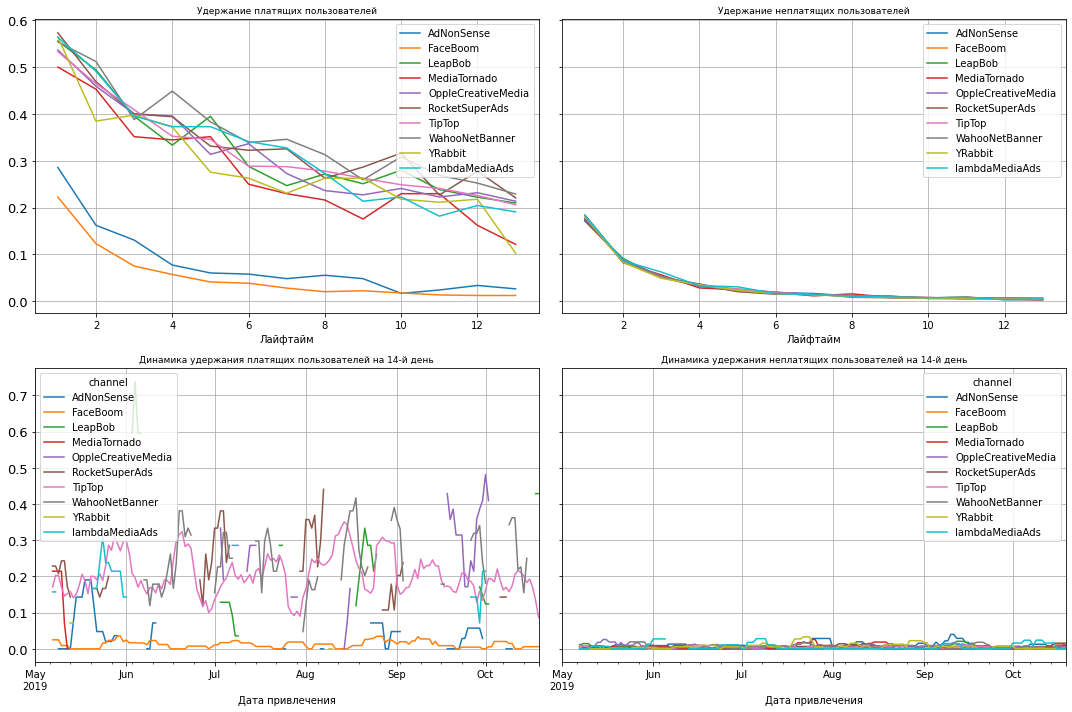

In [55]:
# удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

***Комментарии:***Самая высокая динамика стоимости привлечения пользователей у канала TipTop.Тем не менее, эти маркетинговые расходы не привели к окупаемости. У остальных динамика стабильная.



***Выводы:***

LTV у всех пользователей имеет положительную динамику независимо на канал привлечения. Найбольшую ценность представляют пользователи, привлеченные с lambdaMediaArts и TipTop. У TipTop высокие расходы на маркетинг, что убивает эффективность данного канала.

Необходимо обратить внимание на окупаемость пользователей, привлечённых с других каналов: YRabbit, lambdaMediaArts, MediaTornado.

AdNoneSense и FaceBoom не выходили в плюс за весь анализируемый период.

В целом, окупаемость рекламы со временем падает, а стоимость привлечения пользователей растет. 

США продемонстрировали убытки по ROI. Возрастающие расходы на привлечение клиентов нецелесообразны.

В разрезе по устройствам выявлено снижение динамики окупаемости к 14 дню у всех устройств при росте стоимости привлечения пользователей. Mac и iPhone, а также Android показали результаты ниже уровня окупаемости.

 Плохо конвертируются пользователи из каналов OppleCreativeMedia, MediaTornado, YRabbit, LeapBob.
 
Пользователи с каналов AdNoneSense и Фэйсбум удерживаются хуже всего, обратить внимание на расходы на маркетинг  в этих каналах.

In [56]:
# отдельный анализ по основному региону
USA = profiles.query('region == "United States"')

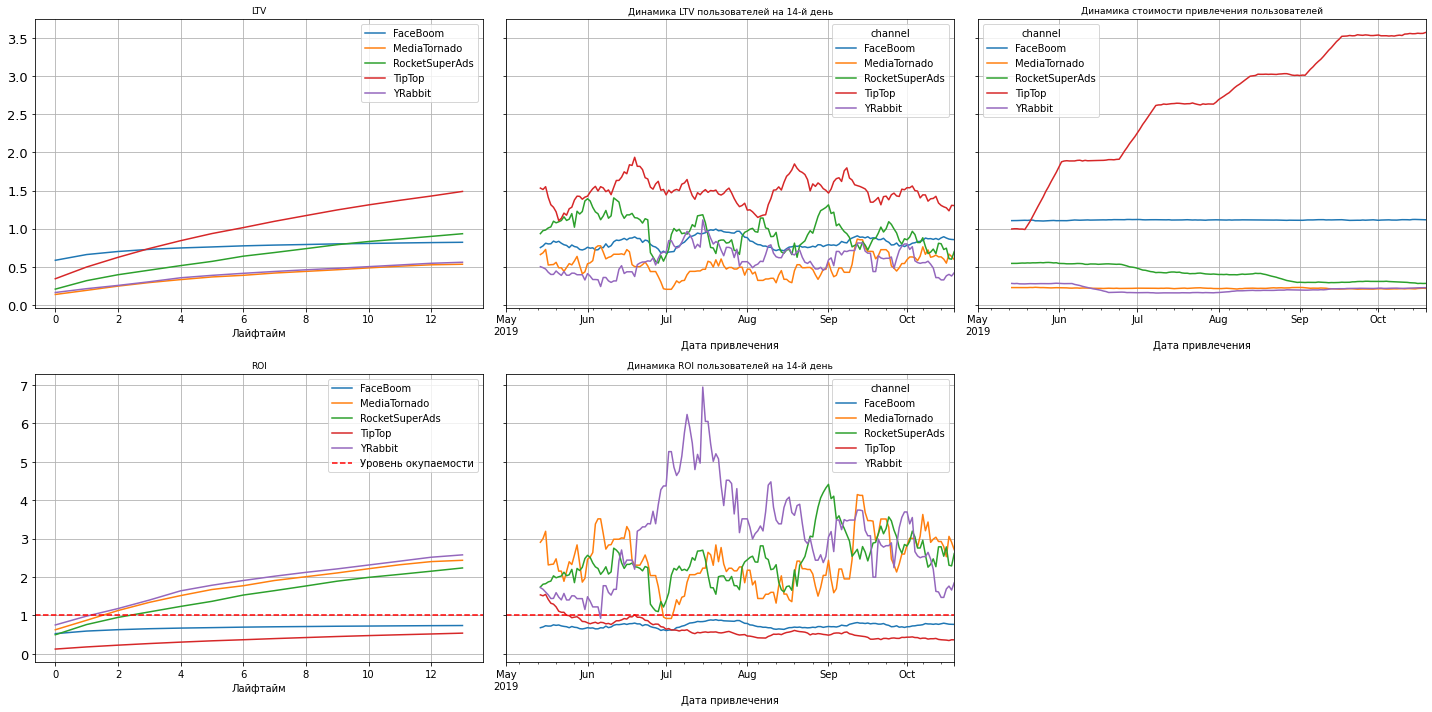

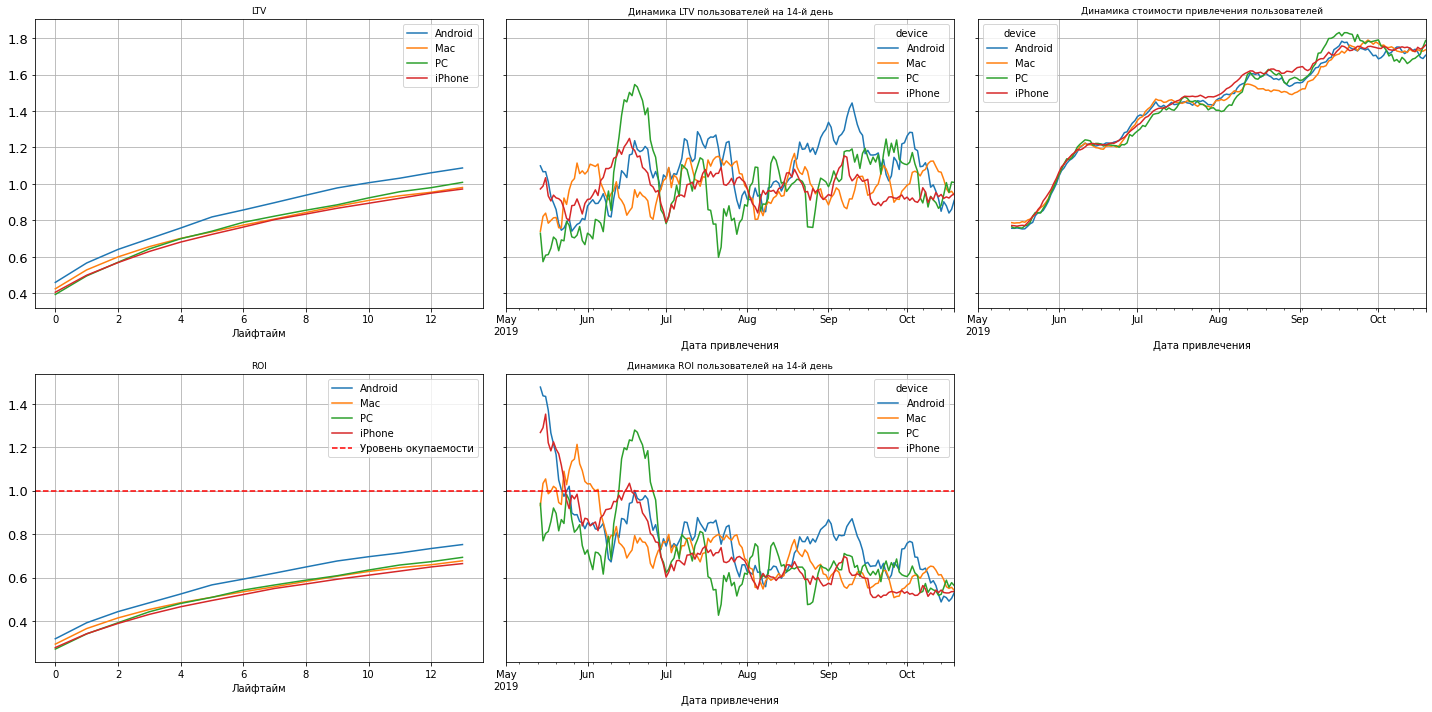

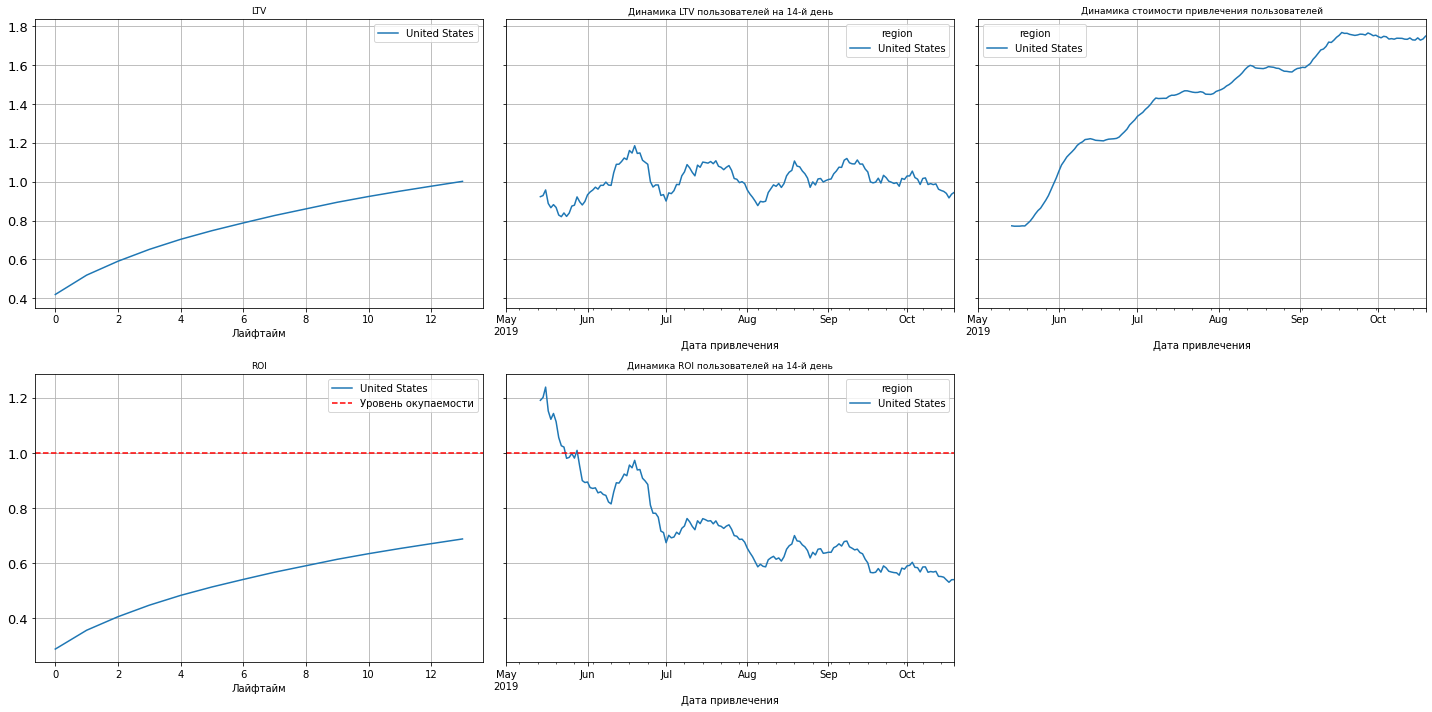

In [57]:
dimensions_list = ['channel', 'device', 'region']
for param in dimensions_list:
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    USA, orders, observation_date, horizon_days, dimensions=[param]
)

    plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

***Комментарии:*** 
В США ни одно устройство не окупилось, при том что динамика стоимости привлечения пользователей примерно одинакова для всех устройств. Динамика стоимости привлечения пользователей через TipTop была значительно выше, чем у других каналов, но расходы на маркетинг  себя не оправдали.

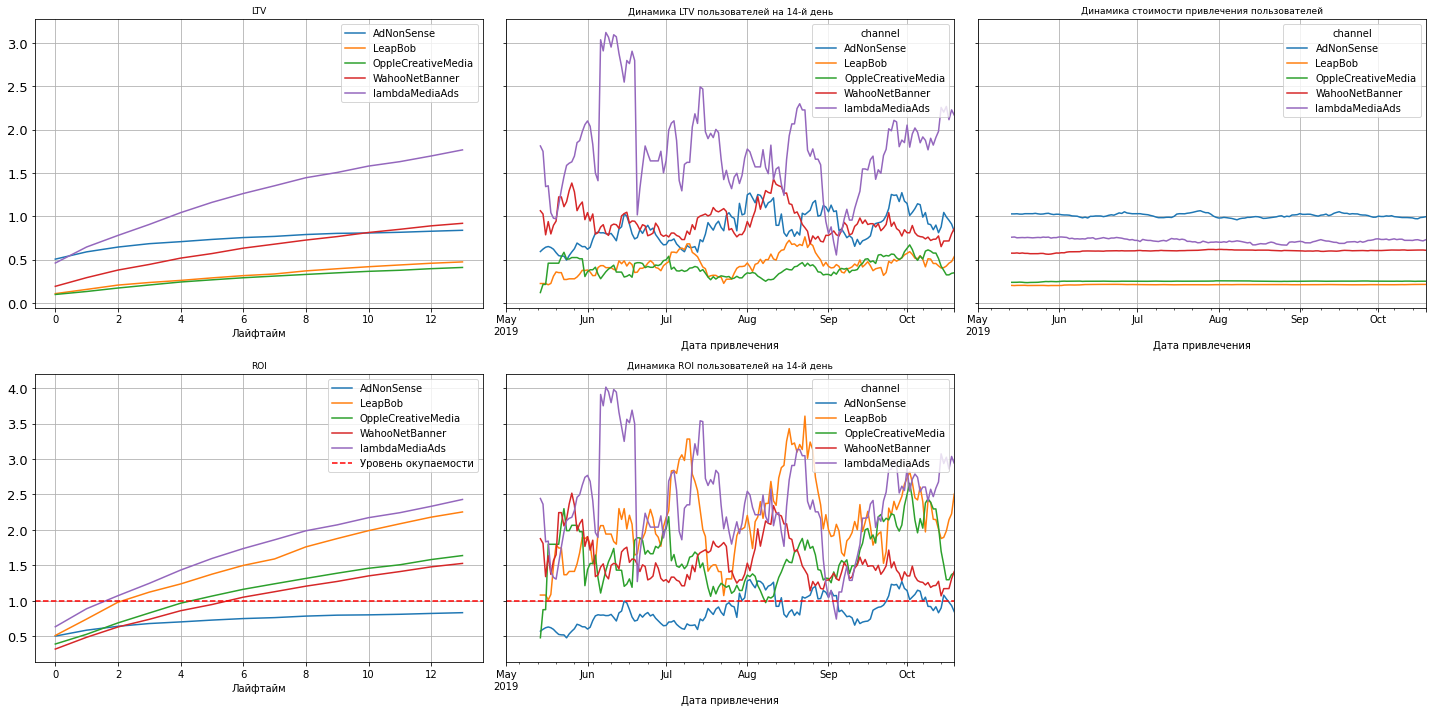

In [58]:
# отдельный анализ по каналам без сша
non_usa = profiles.query('region != "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    non_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

***Комментарии:*** канал AdNonSense не окупается в Европе

### Выводы

- Причины неэффективности привлечения пользователей.

    - Пользователи США перестали окупаться после роста САС. Эффекта от роста маретинговых расходов не было и ROI пошел вниз.
    
    - Мало внимания уделяется владельцам PC - единственные из всех устройств окупаются к концу второй недели. 
    
    - Удержание платящих пользователей из США оказалось на самом низком уровне.
    
    - Пользователи,пришедшие из каналов TipTop и FaceBoom не окупаются по причине больших затрат на рекламу.
    
    - Пользователи из канала FaceBoom и AdNoneSense удерживаются хуже других


- Рекомендации для отдела маркетинга.

    - Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется сократить финансирование на маркетинг в каналах и регионах с большими расходами - это расходы на пользователей из США и канал TipTop.
    
    - Владельцы PC удерживаются лучше всего, необходимо обратить на них внимание.
    
    - Целесообразно обратить внимание на привлечение пользователей с Android.
    
    - Снизить затраты на маркетинг в США.
    
    - Привлекать больше пользователей с канала lambdaMediaArts. 

    - Снизить расходы на рекламу на канале FaceBoom и AdNoneSense

- Рекомендации для отдела маркетинга.

    - Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется сократить финансирование на маркетинг в каналах и регионах с большими расходами - это расходы на пользователей из США и канал TipTop. Обратить внимание на канал AdNonsense в Евпропе, он также не окупается.
    
    - Владельцы PC удерживаются лучше всего, необходимо обратить на них внимание.
    
    - Судя по графикаи ни одно устройство(кроме PC) не окупается. Android находится в более позитивной позиции, по сравнению с остальными гаджетами. Врозможно, после корректировки работы с каналами(исключив дорогие каналы), результаты для гаджетов будут более позитивными.
    
    - Снизить затраты на маркетинг в США.
    
    - Привлекать больше пользователей с канала lambdaMediaArts, YRabbit, MediaTornado, в Европе LeapBob и OppleCreativeMedia

    - Снизить расходы на рекламу на канале FaceBoom и AdNoneSense